In [5]:
##########################################################################
#
#Configurações iniciais
#
##########################################################################
#verifica a pasta de trabalho
getwd()


[1] "C:/Users/crvia"

In [3]:
#Definindo a pasta de trabalho
setwd("C:/Users/crvia/OneDrive/Documentos/R/Enade")

In [1]:
qqq <- function(x, ref.line=TRUE, distr=qnorm, param=list(mean=0, sd=1)){
  x <- na.omit(x)               # remove NA
  xo <- sort(x)                 # ordena a amostra
  n <- length(x)                # número de elementos
  i <- seq_along(x)             # índices posicionais
  pteo <- (i-0.5)/n             # probabilidades teóricas
  qteo <- do.call(distr,        # quantis teóricos sob a distribuição
                  c(list(p=pteo), param))
  plot(xo~qteo)                 # quantis observados ~ quantis teóricos
  if(ref.line){
    qrto <- quantile(x, c(1,3)/4) # 1º e 3º quartis observados
    qrtt <- do.call(distr,        # 1º e 3º quartis teóricos
                    c(list(p=c(1,3)/4), param))
    points(qrtt, qrto, pch=3)     # quartis, por eles passa uma reta de referência
    b <- diff(qrto)/diff(qrtt)    # coeficiente de inclinação da reta
    a <- b*(0-qrtt[1])+qrto[1]    # intercepto da reta
    abline(a=a, b=b)              # reta de referência
  }
}



In [19]:
# NORMALIZACAO MIN-MAX
normalize.minmax <- function(data, norm.set=NULL)
{
  data = data.frame(data)
  if(is.null(norm.set))
  {
    minmax = data.frame(t(sapply(data, max, na.rm=TRUE)))
    minmax = rbind(minmax, t(sapply(data, min, na.rm=TRUE)))
  }
  else {
    minmax = norm.set
  }
  data = rbind(data, minmax)
  normalize_minmax <- function(x)
  {
    maxd = x[length(x)-1]
    mind = x[length(x)]
    return ((x-mind)/(maxd-mind))
  }
  data = data.frame(sapply(data, normalize_minmax))
  data = data[1:(nrow(data)-2),]
  return (list(data, minmax))
}



In [20]:
draw_confusion_matrix <- function(cm) {
  
  layout(matrix(c(1,1,2)))
  par(mar=c(2,2,2,2))
  plot(c(100, 345), c(300, 450), type = "n", xlab="", ylab="", xaxt='n', yaxt='n')
  title('Matriz de Confusão', cex.main=2)
  
  # criando a Matriz
  rect(150, 430, 240, 370, col='#3F97D0')
  text(195, 435, 'Class1', cex=1.2)
  rect(250, 430, 340, 370, col='#F7AD50')
  text(295, 435, 'Class2', cex=1.2)
  text(125, 370, 'Previsto', cex=1.3, srt=90, font=2)
  text(245, 450, 'Atual', cex=1.3, font=2)
  rect(150, 305, 240, 365, col='#F7AD50')
  rect(250, 305, 340, 365, col='#3F97D0')
  text(140, 400, 'Class1', cex=1.2, srt=90)
  text(140, 335, 'Class2', cex=1.2, srt=90)
  
  # add in the cm results 
  res <- as.numeric(cm$table)
  text(195, 400, res[1], cex=1.6, font=2, col='white')
  text(195, 335, res[2], cex=1.6, font=2, col='white')
  text(295, 400, res[3], cex=1.6, font=2, col='white')
  text(295, 335, res[4], cex=1.6, font=2, col='white')
  
  # add in the specifics 
  plot(c(100, 0), c(100, 0), type = "n", xlab="", ylab="", main = "Detalhes", xaxt='n', yaxt='n')
  text(10, 85, names(cm$byClass[1]), cex=1.2, font=2)
  text(10, 70, round(as.numeric(cm$byClass[1]), 3), cex=1.2)
  text(30, 85, names(cm$byClass[2]), cex=1.2, font=2)
  text(30, 70, round(as.numeric(cm$byClass[2]), 3), cex=1.2)
  text(50, 85, names(cm$byClass[5]), cex=1.2, font=2)
  text(50, 70, round(as.numeric(cm$byClass[5]), 3), cex=1.2)
  text(70, 85, names(cm$byClass[6]), cex=1.2, font=2)
  text(70, 70, round(as.numeric(cm$byClass[6]), 3), cex=1.2)
  text(90, 85, names(cm$byClass[7]), cex=1.2, font=2)
  text(90, 70, round(as.numeric(cm$byClass[7]), 3), cex=1.2)
  
  # add in the accuracy information 
  text(30, 35, names(cm$overall[1]), cex=1.5, font=2)
  text(30, 20, round(as.numeric(cm$overall[1]), 3), cex=1.4)
  text(70, 35, names(cm$overall[2]), cex=1.5, font=2)
  text(70, 20, round(as.numeric(cm$overall[2]), 3), cex=1.4)
}  


In [10]:
InstalaPacotes = function(pacote){
  if (pacote %in% rownames(installed.packages())){
    mensagem <- paste("Pacote", pacote, "Já está Instalado")
  }else{
    mensagem <- paste("Instalando Pacote", pacote)
    install.packages(pacote)  
  }
  return(mensagem)  
}


In [11]:
#Instala Pacotes Necessários
InstalaPacotes('dplyr') 
InstalaPacotes('readr')
InstalaPacotes('stringr')
InstalaPacotes('stringi')
InstalaPacotes('sqldf')
InstalaPacotes('microbenchmark')
InstalaPacotes('mgcv')
InstalaPacotes('ggplot2')
InstalaPacotes('sqldf')
InstalaPacotes('tcltk')
InstalaPacotes('e1071')
InstalaPacotes('rminer')
InstalaPacotes('reshape')

InstalaPacotes("caret")
InstalaPacotes("glmnet")
InstalaPacotes("leaps")
InstalaPacotes("rJava")
InstalaPacotes("RWeka")
InstalaPacotes("RWekajars")
InstalaPacotes("FSelector")
InstalaPacotes("doBy")


[1] "Pacote dplyr Já está Instalado"

[1] "Pacote readr Já está Instalado"

[1] "Pacote stringr Já está Instalado"

[1] "Pacote stringi Já está Instalado"

[1] "Pacote sqldf Já está Instalado"

[1] "Pacote microbenchmark Já está Instalado"

[1] "Pacote mgcv Já está Instalado"

[1] "Pacote ggplot2 Já está Instalado"

[1] "Pacote sqldf Já está Instalado"

[1] "Pacote tcltk Já está Instalado"

[1] "Pacote e1071 Já está Instalado"

[1] "Pacote rminer Já está Instalado"

[1] "Pacote reshape Já está Instalado"

[1] "Pacote caret Já está Instalado"

[1] "Pacote glmnet Já está Instalado"

[1] "Pacote leaps Já está Instalado"

[1] "Pacote rJava Já está Instalado"

[1] "Pacote RWeka Já está Instalado"

[1] "Pacote RWekajars Já está Instalado"

[1] "Pacote FSelector Já está Instalado"

[1] "Pacote doBy Já está Instalado"

In [6]:
#Carrega Bibliotecas:
library('dplyr')
library('readr')
library('stringr')
library('stringi')
library('sqldf')
library('microbenchmark')
library('mgcv')
library('ggplot2')
library('sqldf')
library('tcltk')
library('e1071')
library('rminer')
library('reshape')
library("caret")
library("glmnet")
library("leaps")
library("doBy")



Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: gsubfn
Loading required package: proto
Loading required package: RSQLite
Loading required package: DBI
Loading required package: nlme

Attaching package: 'nlme'

The following object is masked from 'package:dplyr':

    collapse

This is mgcv 1.8-15. For overview type 'help("mgcv-package")'.

Attaching package: 'reshape'

The following object is masked from 'package:dplyr':

    rename

Loading required package: Matrix

Attaching package: 'Matrix'

The following object is masked from 'package:reshape':

    expand

Loading required package: foreach
Loaded glmnet 2.0-5



In [7]:
#Carregando os dados 
denade<-read.csv('C:/Users/crvia/OneDrive/Documentos/R/Enade/microdados_enade_2014/2.DADOS/microdados_enade_2014.csv', sep=';', header=TRUE,na="NA")


In [14]:
##########################################################################
#
#Explorar os dados
#
##########################################################################


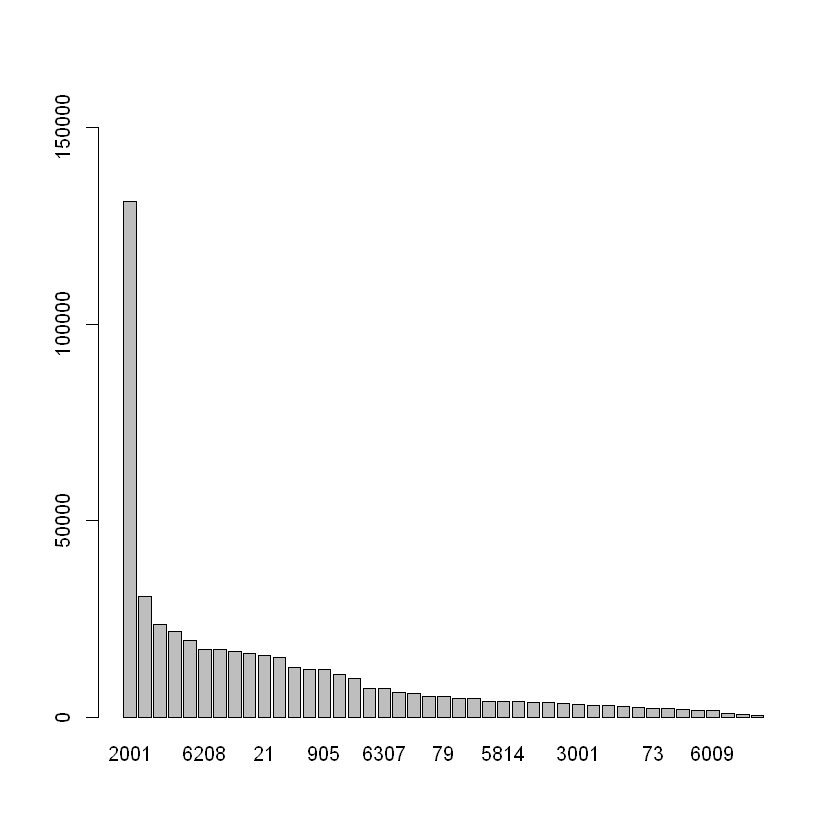

In [15]:
# verifca os grupos
grupo=sort(table(denade$co_grupo),decreasing = T)
grupo=as.data.frame(grupo)
maxgrupo<-max(grupo$Freq)
maxgrupo<-maxgrupo*1.2
barplot(grupo$Freq,names.arg = grupo$Var1, ylim=c(0,maxgrupo))



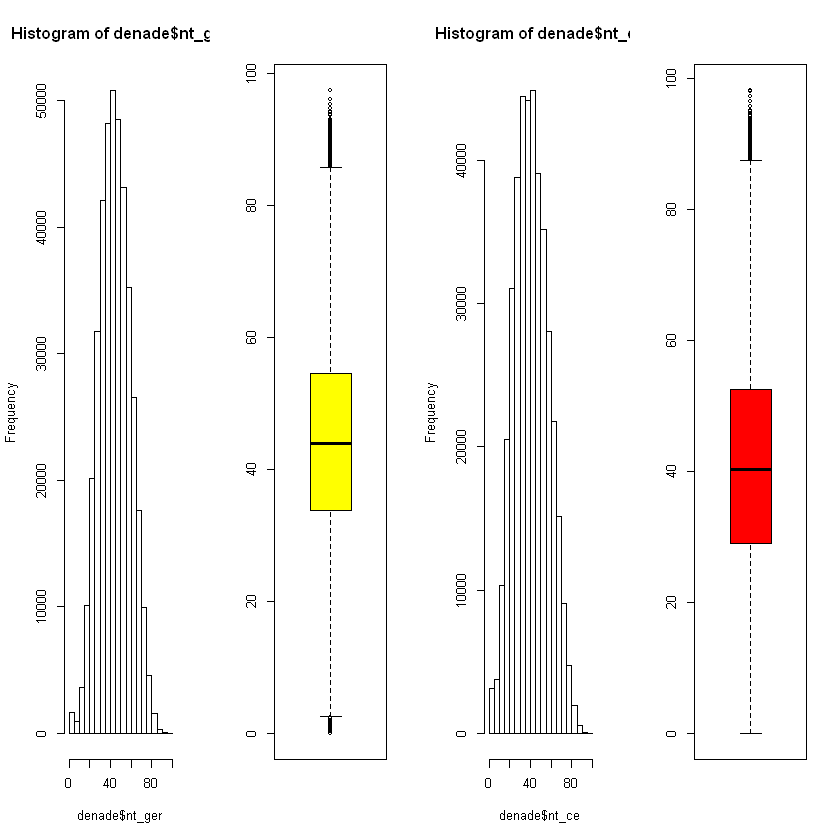

In [36]:
#verifica as notas

par(mfrow=c(1,4))
hist(denade$nt_ger)
boxplot(denade$nt_ger,col="yellow")

hist(denade$nt_ce)
boxplot(denade$nt_ce, col="red")

par(mfrow=c(1,1))


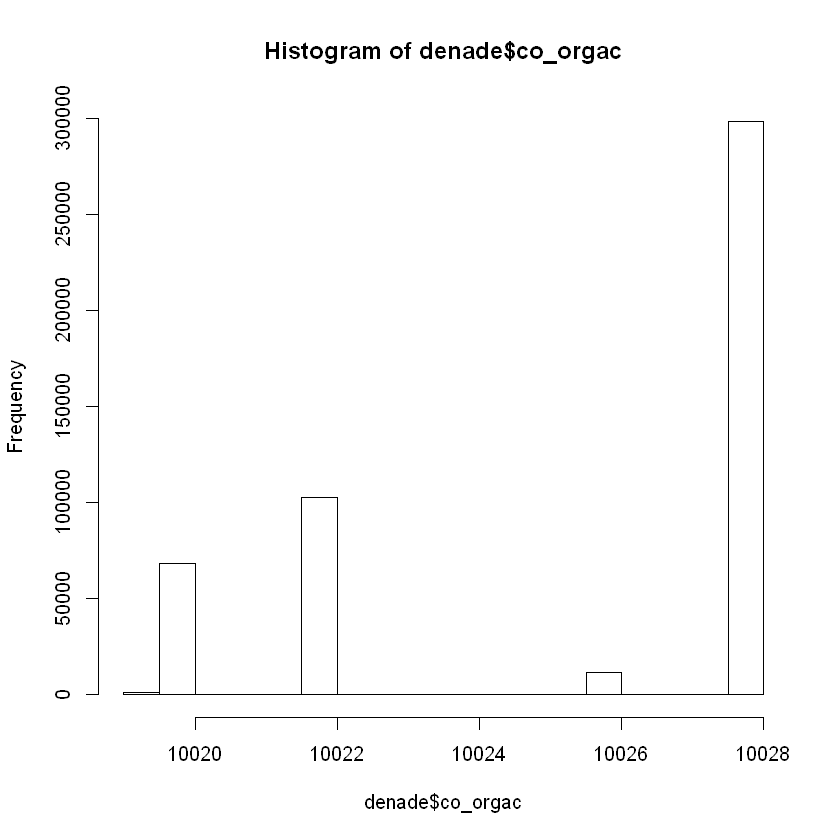

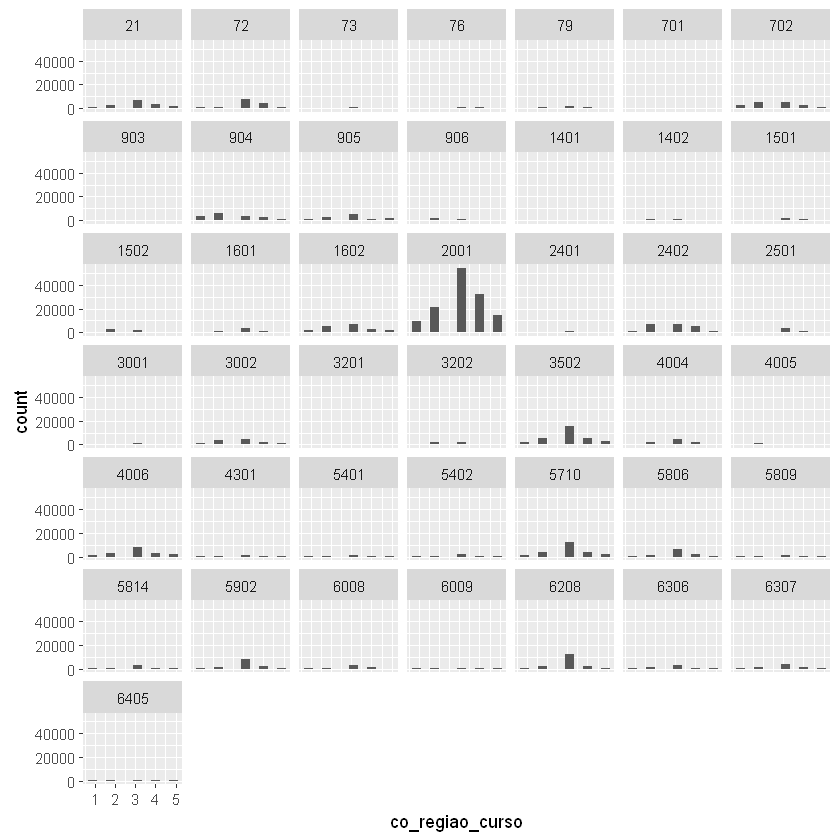

In [8]:
#10019 = Centro Federal de Educação Tecnológica
#10020 = Centro Universitário
#10022 = Faculdade
#10026 = Instituto Federal de Educação, Ciência e Tecnologia
#10028 = Universidade

#histograma das organizações
hist(denade$co_orgac)

#verifica a distribuição dos diversos tipos de cursos
#por regiões
ggplot(denade, aes(x = co_regiao_curso)) + geom_histogram(bins=10) + facet_wrap(~co_grupo)



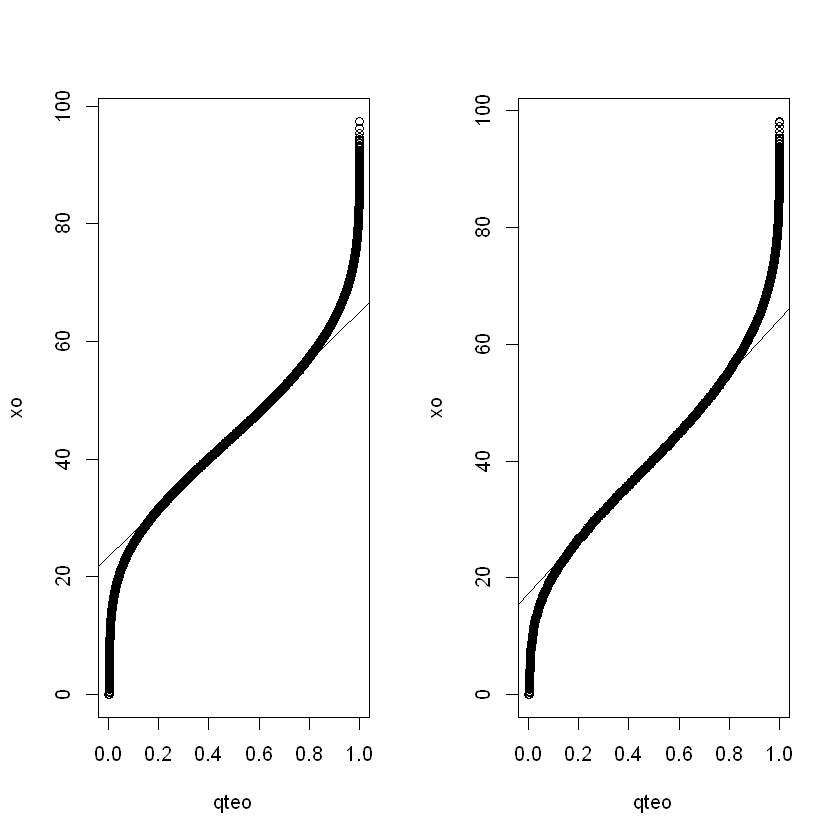

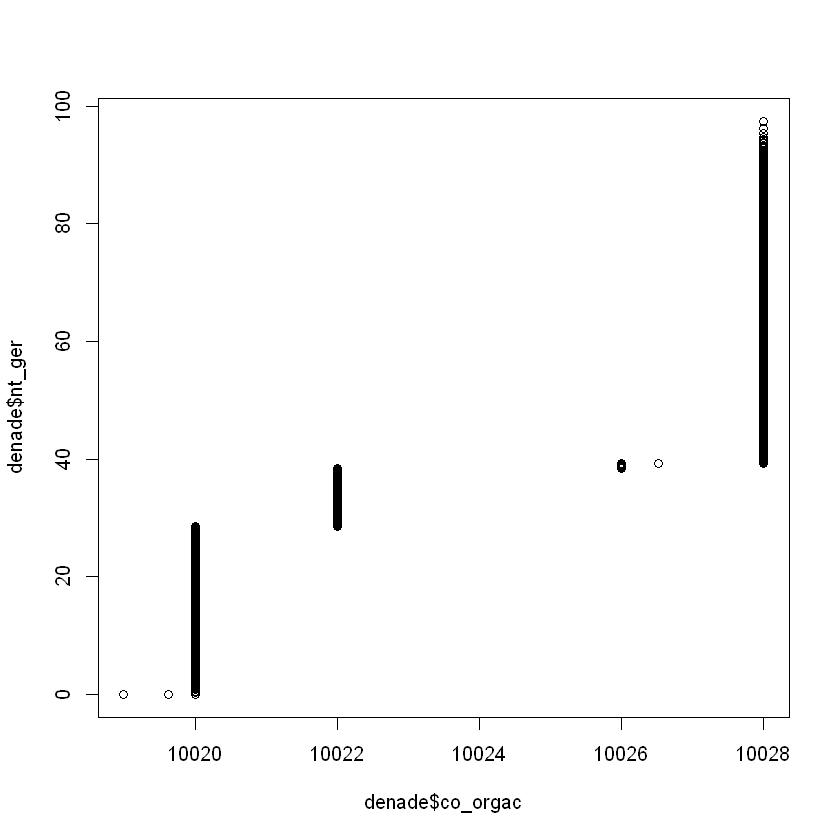

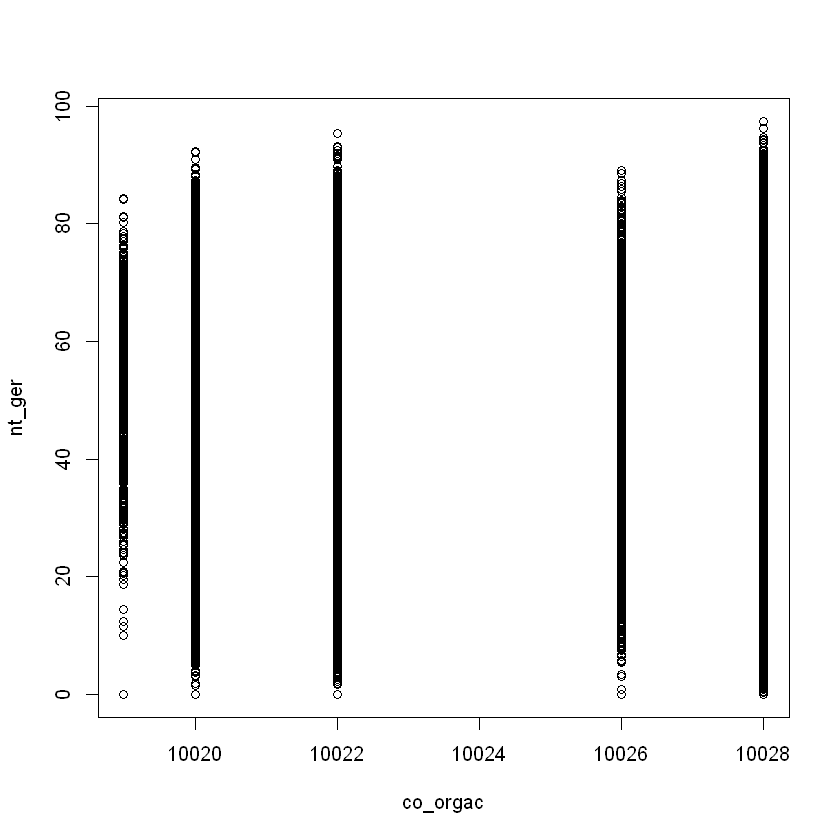

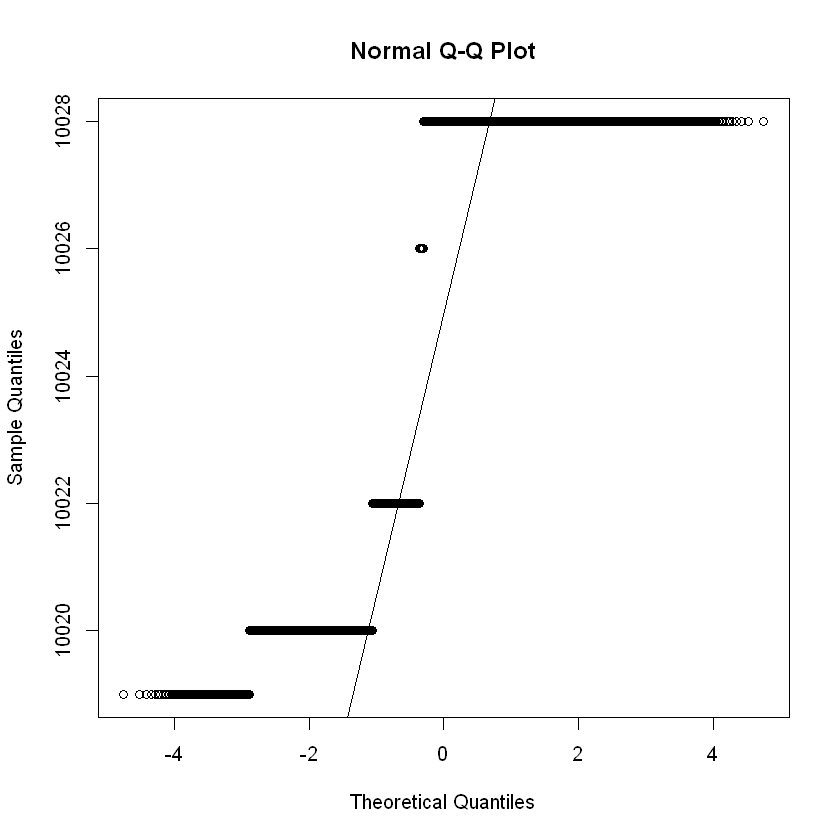

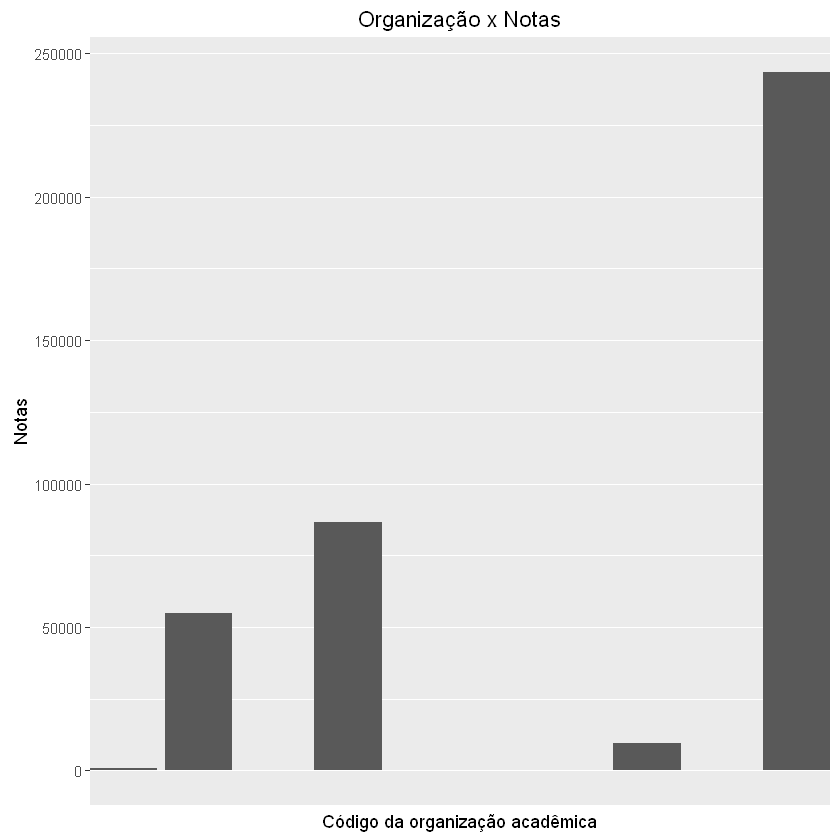

In [9]:
#distribuição  normal das notas média gerais
#distribuição  normal das notas média gerais
par(mfrow=c(1,2))

x <- denade$nt_ger
qqq(x, ref.line=TRUE, distr=qunif, param=list(min=0, max=1))

x <- denade$nt_ce
qqq(x, ref.line=TRUE, distr=qunif, param=list(min=0, max=1))
par(mfrow=c(1,1))


# plot das organizações e notas gerais


qqplot(denade$co_orgac,denade$nt_ger)
plot(~ co_orgac+nt_ger, data=denade)

qqnorm(denade$co_orgac)
qqline(denade$co_orgac)


dado<-denade %>%
  select(co_orgac,nt_ger)%>%
  group_by(co_orgac)%>%
  filter(nt_ger > 0)

ggplot(dado, aes(x=co_orgac,col=co_orgac,fill=co_orgac))+
  geom_bar()+
  scale_x_discrete("Código da organização acadêmica") + 
  scale_y_continuous("Notas")+
  ggtitle("Organização x Notas")


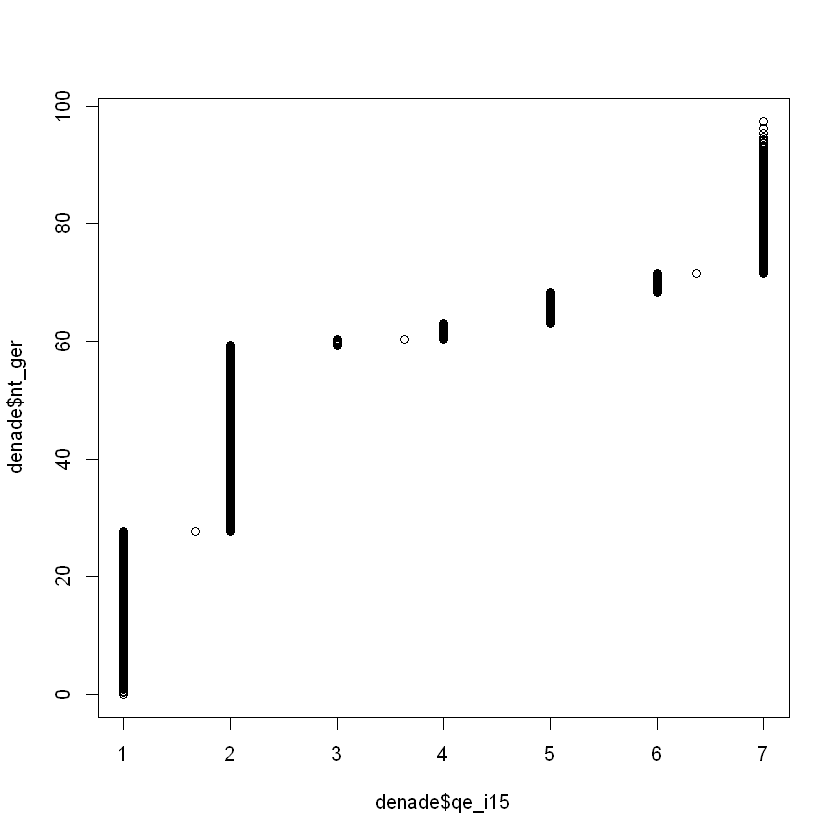

In [38]:
#A ( ) Não.
#B ( ) Sim, por critério étnico-racial.
#C ( ) Sim, por critério de renda.
#D ( ) Sim, por ter estudado em escola pública ou particular com bolsa de estudos.
#E ( ) Sim, por sistema que combina dois ou mais critérios anteriores.
#F ( ) Sim, por sistema diferente dos anteriores.
qqplot(denade$qe_i15,denade$nt_ger)


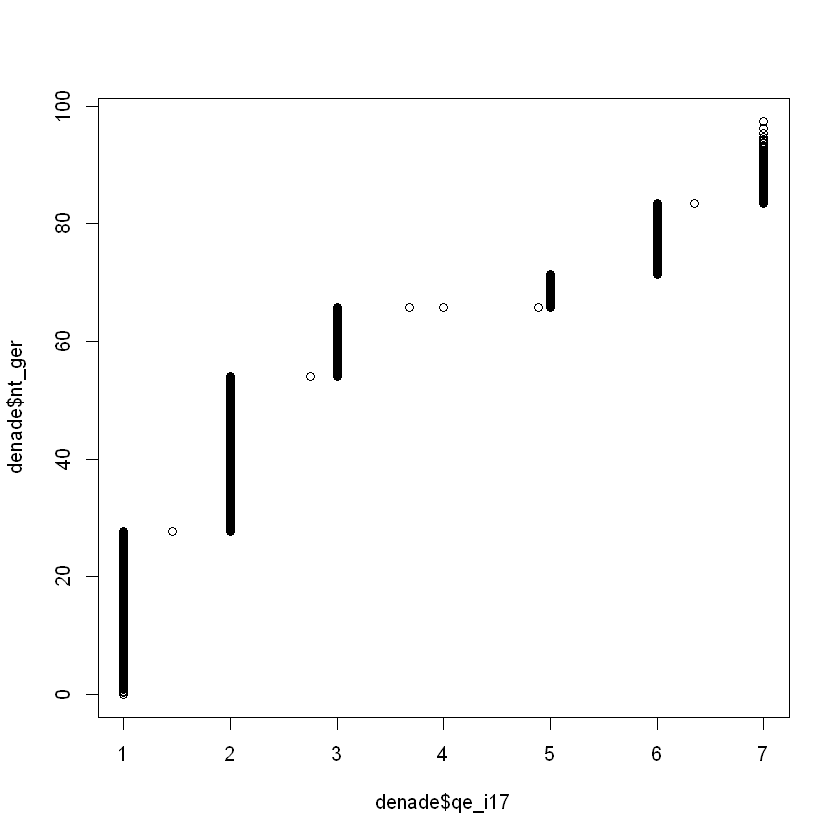

In [39]:
#A ( ) Todo em escola pública.
#B ( ) Todo em escola privada (particular).
#C ( ) Todo no exterior.
#D ( ) A maior parte em escola pública.
#E ( ) A maior parte em escola privada (particular).
#F ( ) Parte no Brasil e parte no exterior
qqplot(denade$qe_i17,denade$nt_ger)


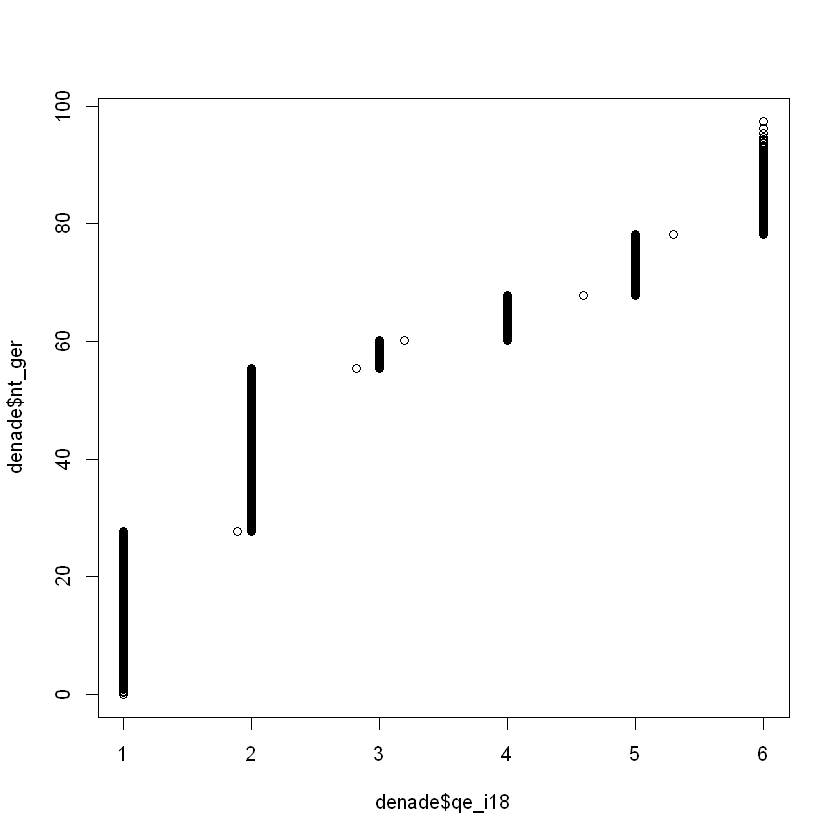

In [40]:
#A ( ) Ensino médio tradicional.
#B ( ) Profissionalizante técnico (eletrônica, contabilidade, agrícola, outro).4
#C ( ) Profissionalizante magistério (Curso Normal).
#D ( ) Educação de Jovens e Adultos (EJA) e/ou Supletivo.
#E ( ) Outra modalidade.
qqplot(denade$qe_i18,denade$nt_ger)


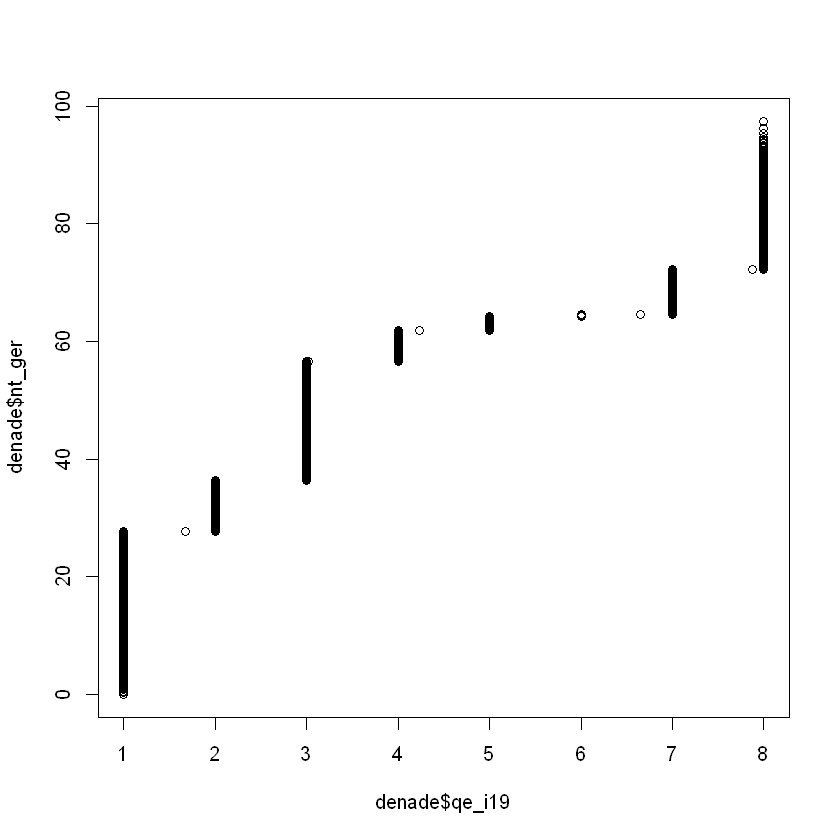

In [41]:
#A ( ) Ninguém.
#B ( ) Pais.
#C ( ) Outros membros da família que não os pais.
#D ( ) Professores.
#E ( ) Líder ou representante religioso.
#F ( ) Colegas/Amigos.
#G ( ) Outras pessoas
qqplot(denade$qe_i19,denade$nt_ger)


Warning message:
"Removed 84944 rows containing missing values (geom_point)."

Warning message:
"Removed 84944 rows containing missing values (geom_point)."

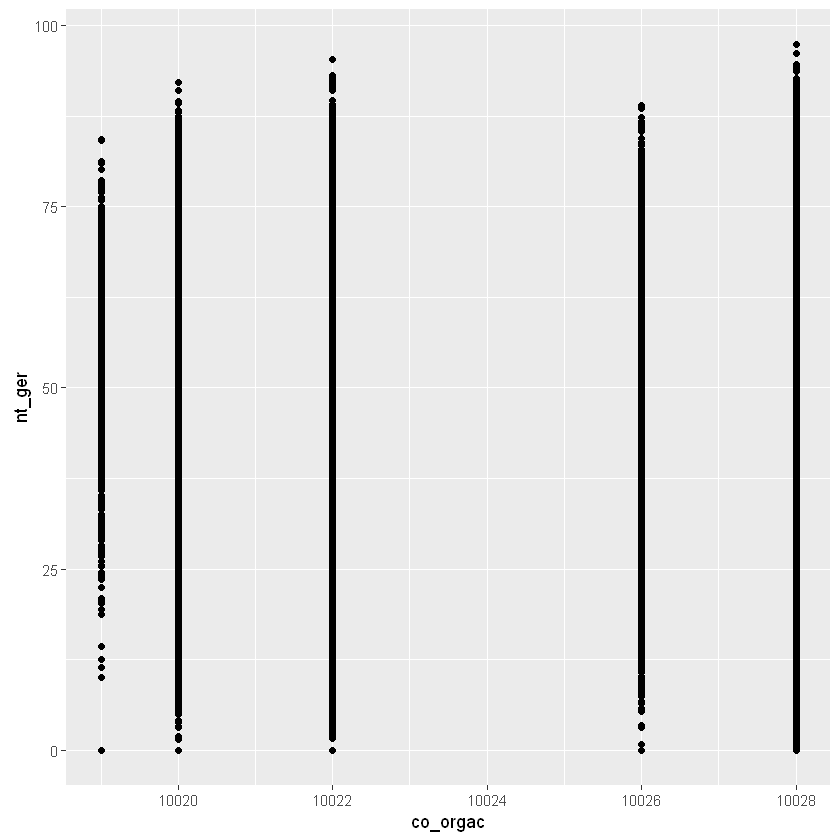

Warning message:
"Removed 84944 rows containing missing values (geom_point)."

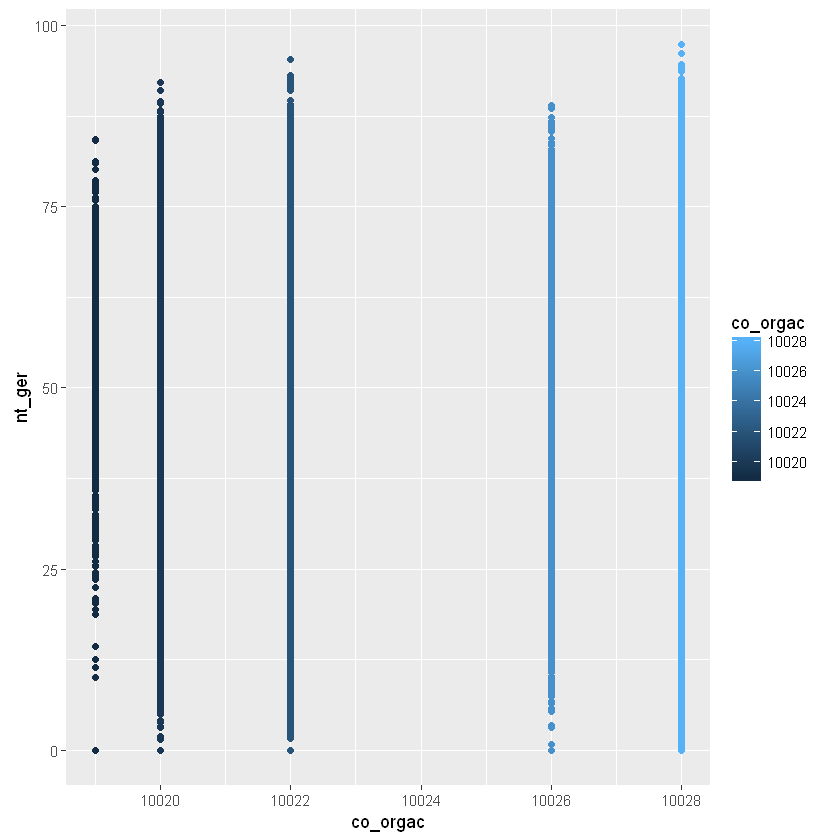

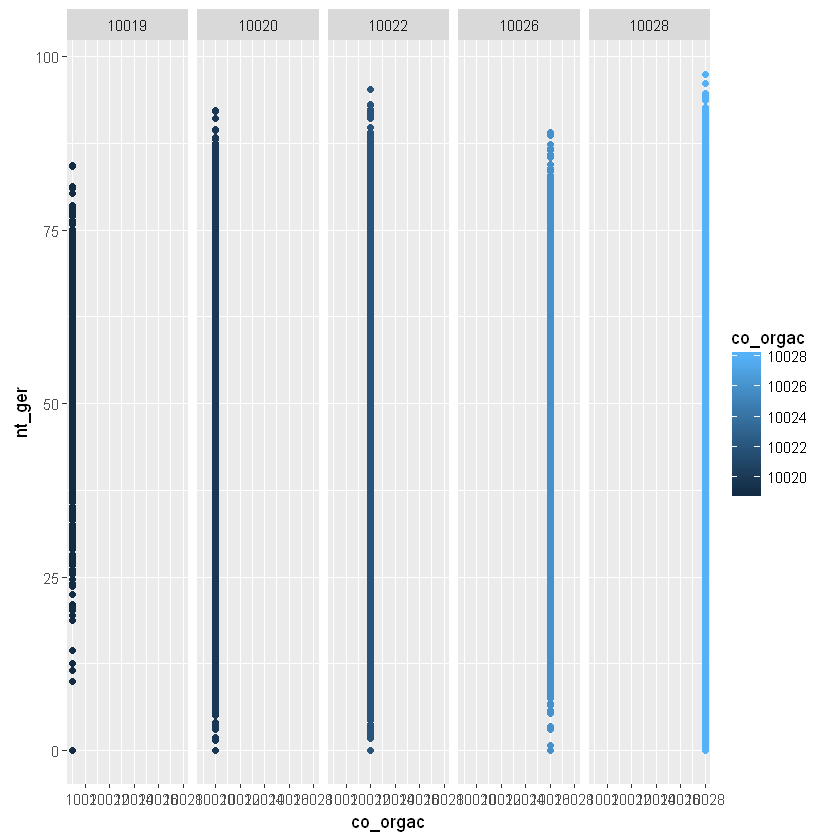

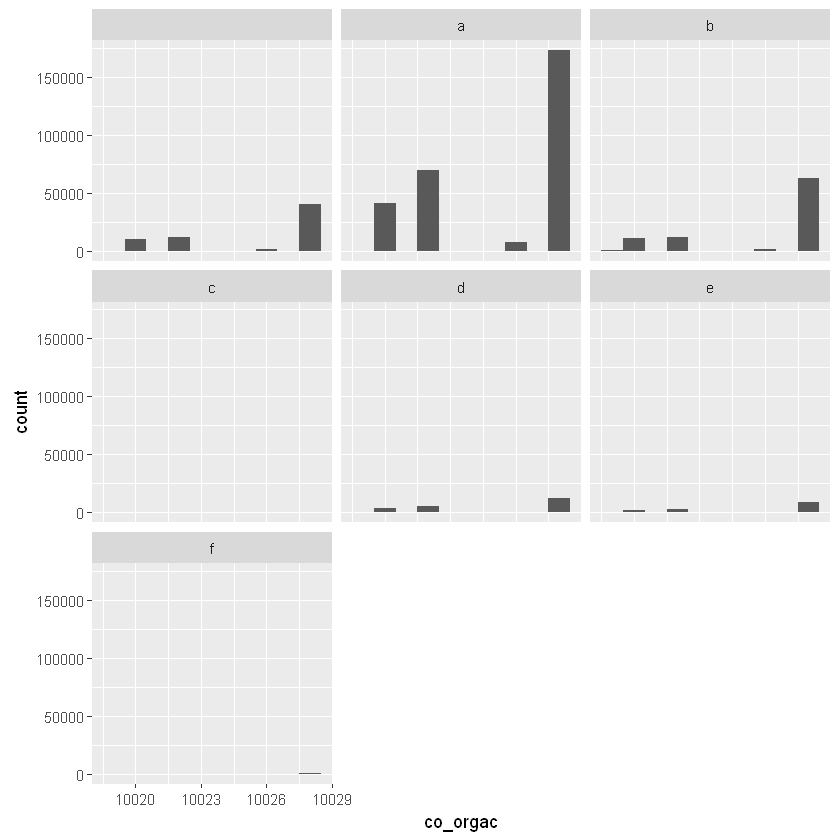

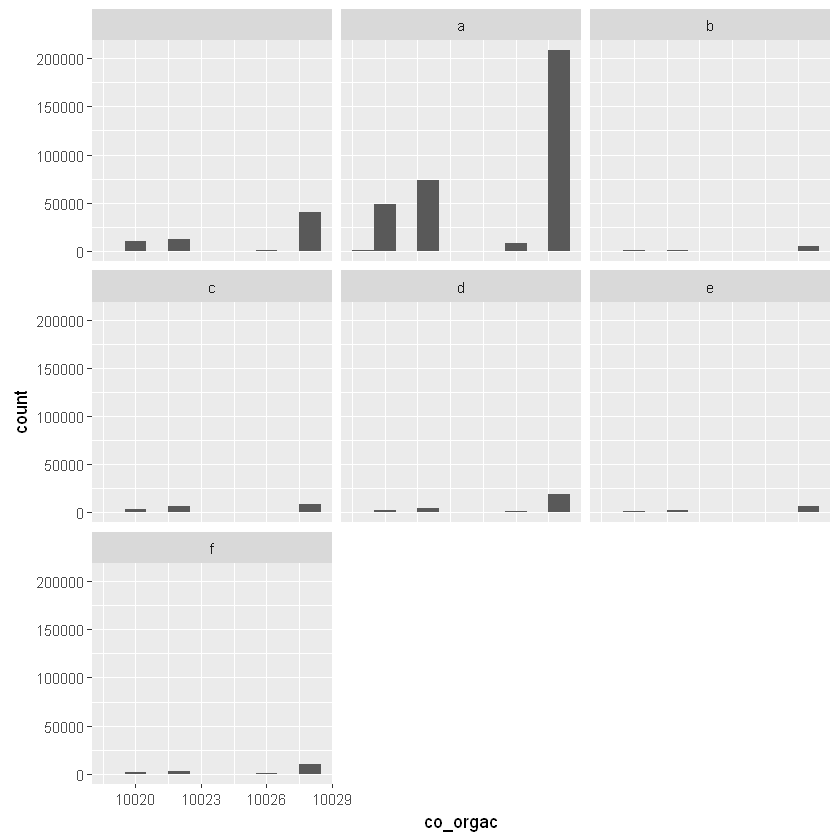

In [42]:
## verifca nota com o tipo de organização com notas

fm <- lm(denade$co_orgac  ~ denade$nt_ger)

g = ggplot(denade, aes(x = co_orgac, y = nt_ger))
g + geom_point()

g + geom_point(aes(color = co_orgac))

g + geom_point(aes(color = co_orgac)) + facet_grid(~ co_orgac)

ggplot(denade, aes(x = co_orgac)) + geom_histogram(bins=10) + facet_wrap(~qe_i17)

ggplot(denade, aes(x = co_orgac)) + geom_histogram(bins=10) + facet_wrap(~qe_i15)


In [18]:
##########################################################################
#
#Pré-Processamento
#
##########################################################################


In [10]:
denade_limpa <- sqldf("SELECT * FROM denade where tp_inscricao=0")
denade_limpa=as.data.frame(denade_limpa)


In [11]:
# verifica dados faltantes no novo dataset
is.na(denade_limpa)

nu_ano,co_grupo,co_ies,co_catad,co_orgac,co_munic_curso,co_uf_curso,co_regiao_curso,co_curso,nu_idade,...,qe_i72,qe_i73,qe_i74,qe_i75,qe_i76,qe_i77,qe_i78,qe_i79,qe_i80,qe_i81
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,...,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,...,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,...,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,...,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,...,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,...,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,...,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,...,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,...,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,...,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE


In [12]:
# vamos tirar as coluna que não iremos utilizar
denade_limpa<-denade[,-c(1,
                    2,
                    3,
                    4,
                    5,
                    6,
                    7,
                    8,
                    9,
                   10,
                   11,
                   12,
                   13,
                   14,
                   15,
                   16,
                   17,
                   18,
                   19,
                   20,
                   21,
                   22,
                   23,
                   24,
                   25,
                   26,
                   27,
                   28,
                   29,
                   30,
                   31,
                   32,
                   33,
                   34,
                   35,
                   36,
                   37,
                   38,
                   39,
                   40,
                   41,
                   42,
                   43,
                   44,
                   45,
                   46,
                   47,
                   48,
                   49,
                   50,
                   51,
                   52,
                   53,
                   54,
                   55,
                   56,
                   57,
                   58,
                   59,
                   60,
                   61,
                   62,
                   63,
                   64,
                   67,
                   68,
                   69,
                   70,
                   71,
                   72,
                   73,
                   74,
                   75,
                   76,
                   77,
                   78,
                   79,
                   80,
                   81,
                   82,
                   83,
                   84,
                   85,
                   86,
                   87,
                   88,
                   89,
                   91,
                   95,
                   96,
                   97,
                   98,
                   99,
                   100,
                   101,
                   102,
                   103,
                   104,
                   105,
                   106,
                   107,
                   108,
                   109,
                   110,
                   111,
                   112,
                   113,
                   114,
                   115,
                   116,
                   117,
                   118,
                   119,
                   120,
                   121,
                   122,
                   123,
                   124,
                   125,
                   126,
                   127,
                   128,
                   129,
                   130,
                   131,
                   132,
                   133,
                   134,
                   135,
                   136,
                   137,
                   138,
                   139,
                   140,
                   141,
                   142,
                   143,
                   144,
                   145,
                   146,
                   147,
                   148,
                   149,
                   150,
                   151,
                   152,
                   153,
                   154,
                   155,
                   156)]


In [21]:

#vamos verificar e preencher dados faltantes das notas
#Preencher 0 nos campos NA de notas
#Nota bruta no componente específico - 
#Média ponderada da parte objetiva (85%) e discursiva (15%) 
#no componente específico (0 a 100)

denade_limpa$nt_ce[is.na(denade_limpa$nt_ce)] <- 0
denade_limpa$nt_ce <- normalize.minmax(denade_limpa$nt_ce)[[1]]


In [22]:
#Nota bruta da prova - Média ponderada da formação geral (25%) 
#e componente específico (75%) (0 a 100)

denade_limpa$nt_ger[is.na(denade_limpa$nt_ger)] <- 0
denade_limpa$nt_ger <- normalize.minmax(denade_limpa$nt_ger)[[1]]


In [23]:
# Nova coluna de se a nota é apta ou não
# inapto= 0
# apto = 1


# se tiver a média total maior que 50 vamos considerar apto
denade_limpa$apto <- 0
denade_limpa$apto[denade_limpa$nt_ger>.50]<-1



In [24]:
#A ( ) Não.
#B ( ) Sim, por critério étnico-racial.
#C ( ) Sim, por critério de renda.
#D ( ) Sim, por ter estudado em escola pública ou particular com bolsa de estudos.
#E ( ) Sim, por sistema que combina dois ou mais critérios anteriores.
#F ( ) Sim, por sistema diferente dos anteriores.

denade_limpa$qe_i15<-as.character(denade_limpa$qe_i15)
denade_limpa$qe_i15[denade_limpa$qe_i15==""] <-"N/A" 
denade_limpa$qe_i15<-as.factor(denade_limpa$qe_i15)

denade_limpa <-data.frame(denade_limpa,model.matrix(~denade_limpa$qe_i15 - 1))


In [25]:

#A ( ) Todo em escola pública.
#B ( ) Todo em escola privada (particular).
#C ( ) Todo no exterior.
#D ( ) A maior parte em escola pública.
#E ( ) A maior parte em escola privada (particular).
#F ( ) Parte no Brasil e parte no exterior
denade_limpa$qe_i17<-as.character(denade_limpa$qe_i17)
denade_limpa$qe_i17[denade_limpa$qe_i17==""] <-"N/A" 
denade_limpa$qe_i17<-as.factor(denade_limpa$qe_i17)

denade_limpa <-data.frame(denade_limpa,model.matrix(~denade_limpa$qe_i17 - 1))



In [26]:
#A ( ) Ensino médio tradicional.
#B ( ) Profissionalizante técnico (eletrônica, contabilidade, agrícola, outro).4
#C ( ) Profissionalizante magistério (Curso Normal).
#D ( ) Educação de Jovens e Adultos (EJA) e/ou Supletivo.
#E ( ) Outra modalidade.
denade_limpa$qe_i18<-as.character(denade_limpa$qe_i18)
denade_limpa$qe_i18[denade_limpa$qe_i18==""] <-"N/A" 
denade_limpa$qe_i18<-as.factor(denade_limpa$qe_i18)

denade_limpa <-data.frame(denade_limpa,model.matrix(~denade_limpa$qe_i18 - 1))



In [27]:
#A ( ) Ninguém.
#B ( ) Pais.
#C ( ) Outros membros da família que não os pais.
#D ( ) Professores.
#E ( ) Líder ou representante religioso.
#F ( ) Colegas/Amigos.
#G ( ) Outras pessoas
denade_limpa$qe_i19<-as.character(denade_limpa$qe_i19)
denade_limpa$qe_i19[denade_limpa$qe_i19==""] <-"N/A" 
denade_limpa$qe_i19<-as.factor(denade_limpa$qe_i19)

denade_limpa <-data.frame(denade_limpa,model.matrix(~denade_limpa$qe_i19 - 1))


In [28]:
##########################################################################
#
#Particionando Dados
#
##########################################################################


In [29]:
# checando o alvo

table(denade_limpa$apto)




     0      1 
330316 151404 

In [30]:
#particionando os dados

part_denade<- sample(2,nrow(denade_limpa),replace =TRUE,prob = c(0.8,0.2))
trei_denade<-denade_limpa[part_denade==1,]
teste_denade<-denade_limpa[part_denade==2,]

nrow(trei_denade)
nrow(teste_denade)


[1] 385410

[1] 96310

In [31]:
## verificando a proporção entre a tabela original de treino e de teste
prop.table(table(trei_denade$apto))
prop.table(table(teste_denade$apto))




        0         1 
0.6857918 0.3142082 


       0        1 
0.685339 0.314661 

In [32]:
##########################################################################
#
#Realizando a predição
#
##########################################################################
# utilizando o pacote e1071

#######
#criando o modelo 
# passando o rótulo alvo
e1071model <- naiveBayes(as.factor(apto) ~ ., data=trei_denade)


In [33]:
# sumário de propabilidade condicional
e1071model



Naive Bayes Classifier for Discrete Predictors

Call:
naiveBayes.default(x = X, y = Y, laplace = laplace)

A-priori probabilities:
Y
        0         1 
0.6857918 0.3142082 

Conditional probabilities:
   nt_ce
Y        [,1]       [,2]
  0 0.2348021 0.16552907
  1 0.5821721 0.09898878

   nt_ger
Y        [,1]       [,2]
  0 0.2675378 0.17761747
  1 0.6089555 0.08042783

   qe_i15
Y             a           b           c           d           e           f
  0 0.656828509 0.014395920 0.040944191 0.046396102 0.016741641 0.032397441
  1 0.807116491 0.014128936 0.036011858 0.076177343 0.034649336 0.030231464
   qe_i15
Y           N/A
  0 0.192296197
  1 0.001684572

   qe_i17
Y              a            b            c            d            e
  0 0.5883637079 0.1424155635 0.0008474865 0.0454578130 0.0294123211
  1 0.6401208928 0.2720666562 0.0009496362 0.0459376213 0.0366311861
   qe_i17
Y              f          N/A
  0 0.0012106950 0.1922924131
  1 0.0026094353 0.0016845721

   qe_i18


In [33]:
#ingresso no curso de graduação se deu por meio de políticas 
#de ação afirmativa ou inclusão social?
#A ( ) Não.
#B ( ) Sim, por critério étnico-racial.
#C ( ) Sim, por critério de renda.
#D ( ) Sim, por ter estudado em escola pública ou particular com bolsa de estudos.
#E ( ) Sim, por sistema que combina dois ou mais critérios anteriores.
#F ( ) Sim, por sistema diferente dos anteriores.
prop.table(table(trei_denade$qe_i15,trei_denade$apto),2)
#checar a frequencia da variavel ingresso por meio de políticas de inclusão social
table(trei_denade$qe_i15,trei_denade$apto)


     
                0           1
  a   0.656517116 0.807185728
  b   0.014378635 0.014222443
  c   0.040869378 0.036027981
  d   0.046355962 0.076509789
  e   0.016966789 0.034413676
  f   0.032488147 0.029976406
  N/A 0.192423973 0.001663976

     
           0      1
  a   173505  97504
  b     3800   1718
  c    10801   4352
  d    12251   9242
  e     4484   4157
  f     8586   3621
  N/A  50854    201

In [34]:
# verificando o tipo de escola
#passando o dado normal sem transformação dos dados
# checar a probabilidade condiconal da tipo de escola
#A ( ) Todo em escola pública.
#B ( ) Todo em escola privada (particular).
#C ( ) Todo no exterior.
#D ( ) A maior parte em escola pública.
#E ( ) A maior parte em escola privada (particular).
#F ( ) Parte no Brasil e parte no exterior
prop.table(table(trei_denade$qe_i17,trei_denade$apto),2)
#checar a frequencia da variavel tipo de escola
table(trei_denade$qe_i17,trei_denade$apto)




     
                 0            1
  a   0.5878629186 0.6402417319
  b   0.1425906516 0.2720890765
  c   0.0008475827 0.0010182541
  d   0.0454175669 0.0457552051
  e   0.0295140400 0.0365743615
  f   0.0013470511 0.0026573948
  N/A 0.1924201891 0.0016639762

     
           0      1
  a   155361  77338
  b    37684  32867
  c      224    123
  d    12003   5527
  e     7800   4418
  f      356    321
  N/A  50853    201

In [35]:
# verificando  Qual modalidade de ensino médio concluído
#passando o dado normal sem transformação dos dados
# checar a probabilidade condiconal da tipo de escola
#A ( ) Ensino médio tradicional.
#B ( ) Profissionalizante técnico (eletrônica, contabilidade, agrícola, outro).4
#C ( ) Profissionalizante magistério (Curso Normal).
#D ( ) Educação de Jovens e Adultos (EJA) e/ou Supletivo.
#E ( ) Outra modalidade.
prop.table(table(trei_denade$qe_i18,trei_denade$apto),2)
#checar a frequencia da variavel ensino médio concluído
table(trei_denade$qe_i18,trei_denade$apto)


     
                0           1
  a   0.583307162 0.741255847
  b   0.072430481 0.102338673
  c   0.089771872 0.102943003
  d   0.053874475 0.043362722
  e   0.008188254 0.008435780
  N/A 0.192427757 0.001663976

     
           0      1
  a   154157  89540
  b    19142  12362
  c    23725  12435
  d    14238   5238
  e     2164   1019
  N/A  50855    201

In [36]:
#Quem lhe deu maior incentivo para cursar a graduação?
#passando o dado normal sem transformação dos dados
# checar a probabilidade condiconal do maior incentivador para cursar a graduação
#A ( ) Ninguém.
#B ( ) Pais.
#C ( ) Outros membros da família que não os pais.
#D ( ) Professores.
#E ( ) Líder ou representante religioso.
#F ( ) Colegas/Amigos.
#G ( ) Outras pessoas
prop.table(table(trei_denade$qe_i19,trei_denade$apto),2)
#checar a frequencia da variavel incentivo do curso de gradução
table(trei_denade$qe_i19,trei_denade$apto)



     
                0           1
  a   0.166655946 0.193410323
  b   0.435911019 0.577234157
  c   0.081265774 0.094830084
  d   0.028806460 0.036359121
  e   0.003991963 0.004462105
  f   0.062895176 0.063504284
  g   0.028049690 0.028535949
  N/A 0.192423973 0.001663976

     
           0      1
  a    44044  23363
  b   115203  69727
  c    21477  11455
  d     7613   4392
  e     1055    539
  f    16622   7671
  g     7413   3447
  N/A  50854    201

In [34]:
# Predição com o dataset de teste
e1071predictions<- predict(e1071model,teste_denade)

e1071predictions

head(e1071predictions,n=5)








IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


[1] 1 1 1 1 1
Levels: 0 1

Confusion Matrix and Statistics

          True
Prediction     0     1
         0 34968    60
         1 31067 30549
                                         
               Accuracy : 0.6779         
                 95% CI : (0.675, 0.6809)
    No Information Rate : 0.6833         
    P-Value [Acc > NIR] : 0.9998         
                                         
                  Kappa : 0.4149         
 Mcnemar's Test P-Value : <2e-16         
                                         
            Sensitivity : 0.9980         
            Specificity : 0.5295         
         Pos Pred Value : 0.4958         
         Neg Pred Value : 0.9983         
             Prevalence : 0.3167         
         Detection Rate : 0.3161         
   Detection Prevalence : 0.6376         
      Balanced Accuracy : 0.7638         
                                         
       'Positive' Class : 1              
                                         


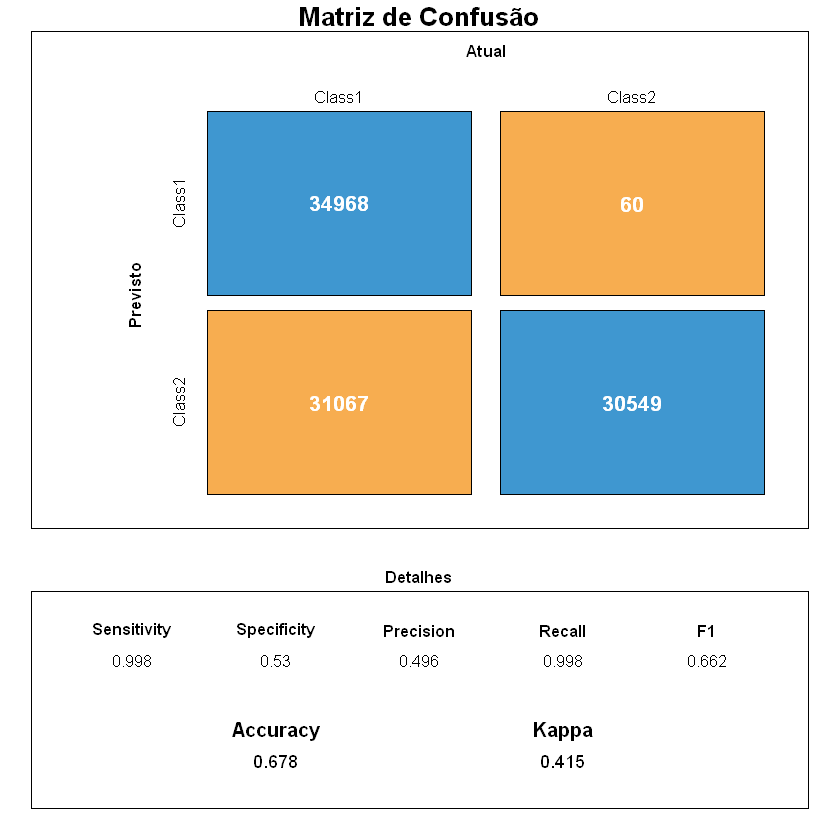

In [42]:
# imprimindo a matriz de confusão
print(confusionMatrix(e1071predictions,teste_denade$apto,positive = "1", dnn = c("Prediction","True")))
### desenhando a matriz de confusão 
draw_confusion_matrix(cm)

In [43]:
## utilizando mmetric para calcular a acuracia e a precisão
##
mmetric(as.factor(teste_denade$apto),e1071predictions,c("ACC","PRECISION","TPR","F1"))



ACC PRECISION1 PRECISION2       TPR1       TPR2        F11        F12 
  67.79210   99.82871   49.57965   52.95374   99.80398   69.20040   66.24885

In [37]:
##########################################################################
#
#2.a Particionando Dados
#Colocando agora apenas as notas que foram maior que zero
##########################################################################

# checando o alvo


denade_zero <- sqldf("SELECT * FROM denade_limpa where nt_ger>0")
denade_zero=as.data.frame(denade_zero)

table(denade_zero$apto)



     0      1 
243899 151404 

In [38]:
#particionando os dados

part_denade_zero<- sample(2,nrow(denade_zero),replace =TRUE,prob = c(0.8,0.2))
trei_denade_zero<-denade_zero[part_denade==1,]
teste_denade_zero<-denade_zero[part_denade==2,]

nrow(trei_denade_zero)
nrow(teste_denade_zero)



[1] 385410

[1] 96310

In [39]:
## verificando a proporção entre a tabela original de treino e de teste
prop.table(table(trei_denade_zero$apto))
prop.table(table(teste_denade_zero$apto))



        0         1 
0.6173122 0.3826878 


        0         1 
0.6157095 0.3842905 

In [40]:
##########################################################################
#
#2.a Realizando a predição
#
##########################################################################
# utilizando o pacote e1071

#######

#criando o modelo 
# passando o rótulo alvo
e1071model_zero <- naiveBayes(as.factor(apto) ~ ., data=trei_denade_zero)


In [41]:
# sumário de propabilidade condicional
e1071model_zero




Naive Bayes Classifier for Discrete Predictors

Call:
naiveBayes.default(x = X, y = Y, laplace = laplace)

A-priori probabilities:
Y
        0         1 
0.6173122 0.3826878 

Conditional probabilities:
   nt_ce
Y        [,1]       [,2]
  0 0.3182984 0.10308653
  1 0.5821693 0.09890643

   nt_ger
Y        [,1]       [,2]
  0 0.3627663 0.09133754
  1 0.6090328 0.08039078

   qe_i15
Y             a           b           c           d           e           f
  0 0.809837526 0.017347994 0.051660063 0.056261965 0.020204347 0.040516191
  1 0.805953511 0.014045663 0.036637629 0.076784608 0.034639363 0.030279510
   qe_i15
Y           N/A
  0 0.004171914
  1 0.001659717

   qe_i17
Y              a            b            c            d            e
  0 0.7323474308 0.1700553866 0.0010033068 0.0552740154 0.0356378677
  1 0.6401882664 0.2721605219 0.0009908757 0.0459270881 0.0364229388
   qe_i17
Y              f          N/A
  0 0.0015100791 0.0041719136
  1 0.0026505925 0.0016597168

   qe_i18


In [42]:
# verificando o tipo de escola
#passando o dado normal sem transformação dos dados
# checar a probabilidade condiconal da tipo de escola
prop.table(table(trei_denade_zero$qe_i17,trei_denade_zero$apto),2)


     
                 0            1
  a   0.7323474308 0.6401882664
  b   0.1700553866 0.2721605219
  c   0.0010033068 0.0009908757
  d   0.0552740154 0.0459270881
  e   0.0356378677 0.0364229388
  f   0.0015100791 0.0026505925
  N/A 0.0041719136 0.0016597168

In [43]:
#checar a frequencia da variavel tipo de escola
table(trei_denade_zero$qe_i17,trei_denade_zero$apto)


     
           0      1
  a   143067  77530
  b    33221  32960
  c      196    120
  d    10798   5562
  e     6962   4411
  f      295    321
  N/A    815    201

In [44]:
# Predição com o dataset de teste com notas maiores que zero
e1071predictions_zero<- predict(e1071model_zero,teste_denade_zero)

e1071predictions_zero

head(e1071predictions_zero,n=5)




IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


[1] 1 1 0 1 1
Levels: 0 1

Confusion Matrix and Statistics

          True
Prediction     0     1
         0 42234  1712
         1  6947 28387
                                          
               Accuracy : 0.8908          
                 95% CI : (0.8886, 0.8929)
    No Information Rate : 0.6203          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.7757          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9431          
            Specificity : 0.8587          
         Pos Pred Value : 0.8034          
         Neg Pred Value : 0.9610          
             Prevalence : 0.3797          
         Detection Rate : 0.3581          
   Detection Prevalence : 0.4457          
      Balanced Accuracy : 0.9009          
                                          
       'Positive' Class : 1               
                                          


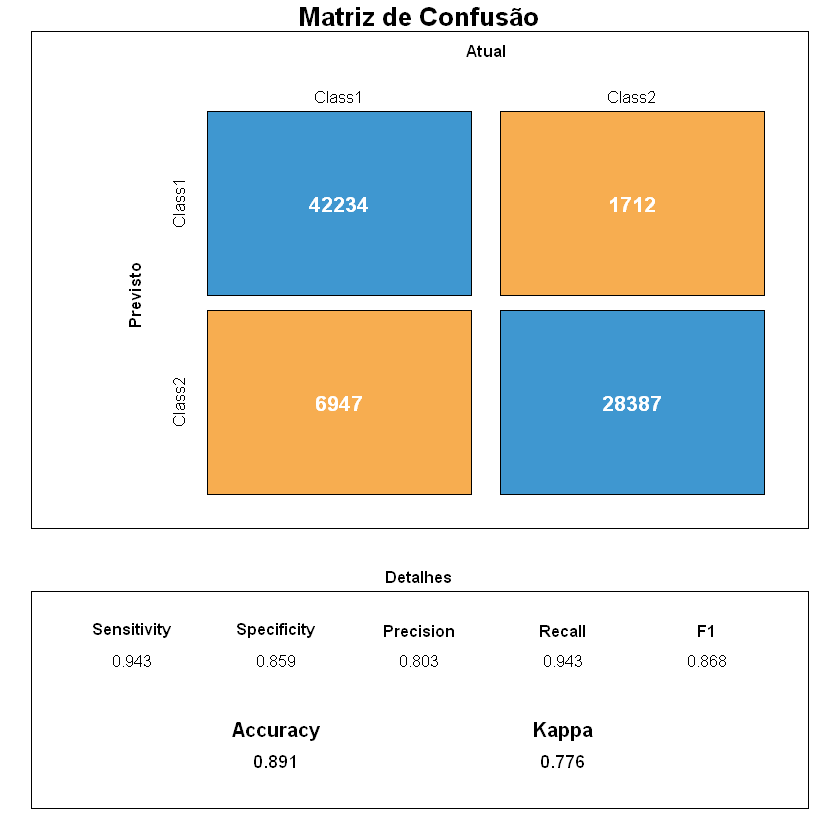

In [53]:
#imprimindo a amtriz de confusão
print(confusionMatrix(e1071predictions_zero,teste_denade_zero$apto,positive = "1", dnn = c("Prediction","True")))
cm_zero<-confusionMatrix(e1071predictions_zero,teste_denade_zero$apto,positive = "1", dnn = c("Prediction","True"))

### desenhando a matriz de confusão 
draw_confusion_matrix(cm_zero)


In [54]:
## utilizando mmetric para calcular a acuracia e a precisão
##
mmetric(as.factor(teste_denade_zero$apto),e1071predictions,c("ACC","PRECISION","TPR","F1"))


ACC PRECISION1 PRECISION2       TPR1       TPR2        F11        F12 
  39.14366   62.67419   38.36535   38.86664   62.17815   47.97942   47.45183